In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
columns_measurement = inspector.get_columns('measurement')
for c in columns_measurement:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Declare a Base using `automap_base()`

Base = automap_base()

# Use the Base class to reflect the database tables

Base.prepare(autoload_with=engine)

In [9]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [10]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Station = Base.classes.station
Measurement = Base.classes.measurement

In [11]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [13]:
prcp_12months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date < '2017-08-23', Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()
prcp_12months

[('2016-08-23', 0.0),
 ('2016-08-23', 3.8),
 ('2016-08-23', 1.3),
 ('2016-08-23', None),
 ('2016-08-23', 0.5),
 ('2016-08-23', 45.5),
 ('2016-08-23', 17.8),
 ('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9

In [14]:
prcp12_df = pd.DataFrame(prcp_12months)
prcp12_df.rename(columns={'date':'Date','prcp':'Precipitation'},inplace=True)
prcp12_df

,Date,Precipitation
0,2016-08-23,0.0
1,2016-08-23,3.8
2,2016-08-23,1.3
3,2016-08-23,NaN
4,2016-08-23,0.5
...,...,...
2221,2017-08-21,NaN
2222,2017-08-21,14.2
2223,2017-08-22,0.0
2224,2017-08-22,0.0


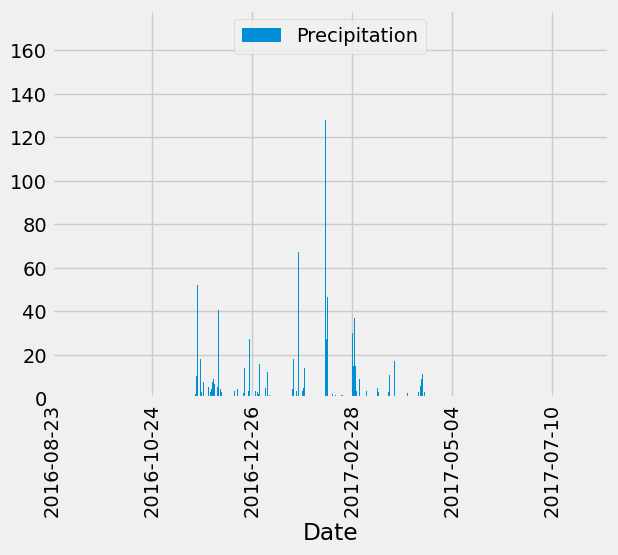

In [16]:
prcp12_df.plot.bar(x='Date',y='Precipitation')
#plt.figure(figsize=(6, 6))
plt.xticks(prcp12_df.index[::400], prcp12_df['Date'][::400], rotation='vertical')
plt.show()

In [37]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

In [38]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp12_df.describe()

,Precipitation
count,2017.000000
mean,4.508180
std,11.723104
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [40]:
station_counts = session.query(Measurement.station, func.count(Measurement.prcp)).\
    group_by(Measurement.station).all()
station_counts

[('USC00511918', 1932),
 ('USC00513117', 2696),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00517948', 683),
 ('USC00518838', 342),
 ('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00519523', 2572)]

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# station_counts = session.query(Measurement.station, Measurement.prcp).count().\
#     order_by(Measurement.station).all()
# station_counts

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats_temp = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
stats_temp

[('USC00519281', 12.2, 29.4, 22.03582251082252)]

In [43]:
temp_12months = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date < '2017-08-23', Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()
temp_12months_df = pd.DataFrame(temp_12months)
temp_12months_df

,date,tobs
0,2016-08-23,27.2
1,2016-08-23,24.4
2,2016-08-23,26.7
3,2016-08-23,26.7
4,2016-08-23,26.7
...,...,...
2221,2017-08-21,27.8
2222,2017-08-21,24.4
2223,2017-08-22,27.8
2224,2017-08-22,27.8


In [44]:
temp_12months_df.rename(columns={'tobs':'temperature'},inplace=True)
temp_12months_df

,date,temperature
0,2016-08-23,27.2
1,2016-08-23,24.4
2,2016-08-23,26.7
3,2016-08-23,26.7
4,2016-08-23,26.7
...,...,...
2221,2017-08-21,27.8
2222,2017-08-21,24.4
2223,2017-08-22,27.8
2224,2017-08-22,27.8


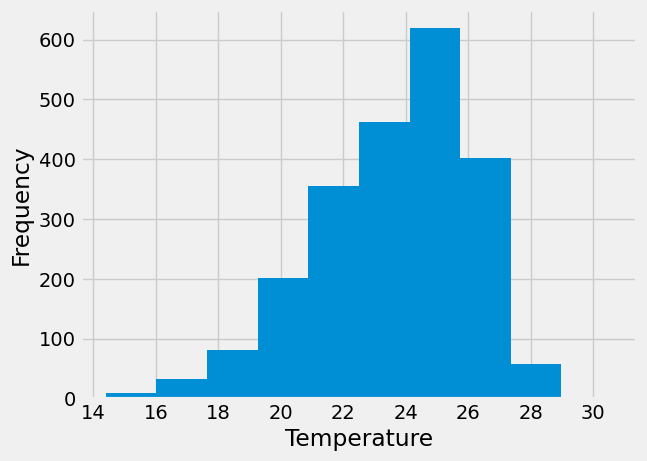

In [45]:
#emp_12months_df.plot.hist()
#lt.xticks(temp_12months_df.index[::], temp_12months_df['date'][::400], rotation='vertical')
plt.hist(temp_12months_df['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [46]:
# Close Session
session.close()
